In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=60000,test_size=10000)

In [3]:
x_train.shape

(60000, 784)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.2089 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0858 - acc: 0.9734
Epoch 3/10
60000/60000 [==============================] - 38s 637us/step - loss: 0.0573 - acc: 0.9816
Epoch 4/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0466 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.0345 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0291 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0258 - acc: 0.9911
Epoch 8/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0209 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0206 - acc: 0.9930
Epoch 10/10
60000/60000 [=========

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 234us/step


[0.06634256232646003, 0.9852]

6


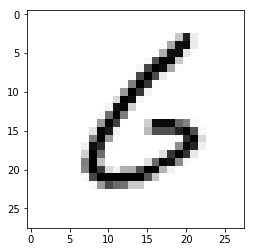

In [8]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())